In [8]:
import numpy as np
from matplotlib import pyplot as plt



In [2]:

#print(colormaps)
plt.figure(figsize=(3, 3))
drift = 0.001
xmin, xmax = -1.00001, 1.000010
ymin, ymax = -1.000010, 1.000010
zmin, zmax = -1.000010, 1.000010

xsamples = 2 ** 4
ysamples = 2 ** 4
zsamples = 2 ** 4

xrange = np.linspace(xmin, xmax, num=xsamples)
yrange = np.linspace(ymin, ymax, num=ysamples)
zrange = np.linspace(zmin, zmax, num=zsamples)
dx = xrange[1] - xrange[0]
dy = yrange[1] - yrange[0]
dz = zrange[1] - zrange[0]

x, y= np.meshgrid(xrange, yrange)
X,Y,Z = np.meshgrid(xrange, yrange, zrange, indexing='ij')


<Figure size 300x300 with 0 Axes>

In [3]:
options = {
    "extent": (xmin, xmax, ymin, ymax),
    "origin": "lower",
    "aspect": "equal",
}


def imshow(data, **kwargs):
    plt.figure(figsize=(3, 3))
    plt.imshow(data, **options, **kwargs)
    plt.colorbar()
    plt.show()

In [4]:
def quiver(data,stride=4,**kwargs):
    xstride = len(x) // 2**stride
    ystride = len(y) // 2**stride
    xi = x#[::ystride, ::xstride]
    yi = y#[::ystride,::xstride]
    datai = data#[:,::ystride, ::xstride]
    plt.quiver(xi,yi,datai[0],datai[1],**kwargs)


In [5]:
def plot_3d(data):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(x,y,data,cmap='viridis')

In [6]:
def divergence(data):
    div = np.gradient(data[0],axis=0) + np.gradient(data[1],axis=1)
    return div


In [7]:
vec_r = np.array([x, y])
r = np.linalg.norm(vec_r,axis=0)
r.shape

(16, 16)

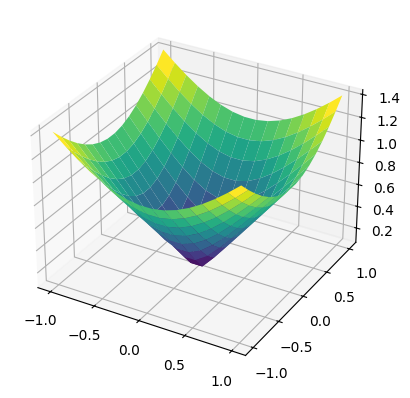

In [8]:
#imshow(r)
plot_3d(r)

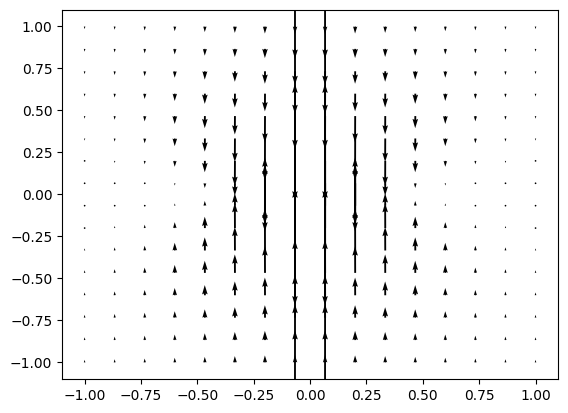

In [9]:
offset = np.array([np.zeros_like(x)+8,np.zeros_like(y)])

columb = -(vec_r+offset)/(np.pow(r+offset,3)+0.001) + -(vec_r-offset)/(np.pow(r-offset,3)+0.001)

columb.shape
quiver(columb)


array([[[ 1.00002   ,  1.00002   ,  1.00002   ,  1.00002   ,
          1.00002   ,  1.00002   ,  1.00002   ,  1.00002   ,
          1.00002   ,  1.00002   ,  1.00002   ,  1.00002   ,
          1.00002   ,  1.00002   ,  1.00002   ,  1.00002   ],
        [ 0.75112613,  0.75112613,  0.75112613,  0.75112613,
          0.75112613,  0.75112613,  0.75112613,  0.75112613,
          0.75112613,  0.75112613,  0.75112613,  0.75112613,
          0.75112613,  0.75112613,  0.75112613,  0.75112613],
        [ 0.53778853,  0.53778853,  0.53778853,  0.53778853,
          0.53778853,  0.53778853,  0.53778853,  0.53778853,
          0.53778853,  0.53778853,  0.53778853,  0.53778853,
          0.53778853,  0.53778853,  0.53778853,  0.53778853],
        [ 0.3600072 ,  0.3600072 ,  0.3600072 ,  0.3600072 ,
          0.3600072 ,  0.3600072 ,  0.3600072 ,  0.3600072 ,
          0.3600072 ,  0.3600072 ,  0.3600072 ,  0.3600072 ,
          0.3600072 ,  0.3600072 ,  0.3600072 ,  0.3600072 ],
        [ 0.21778213

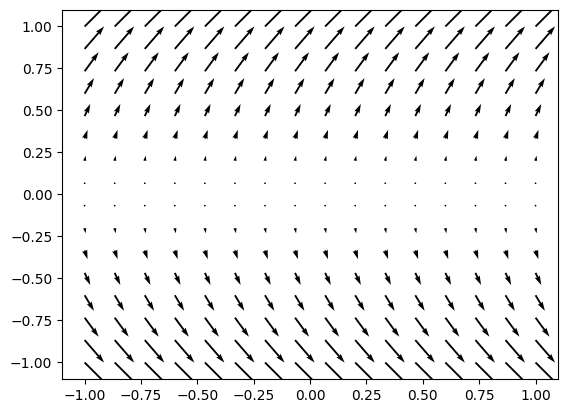

In [10]:
y_vec = np.array([y*y,y])
quiver(y_vec)
divergence(y_vec)
y_vec.shape
y_vec

In [11]:

#quiver(columb,6)

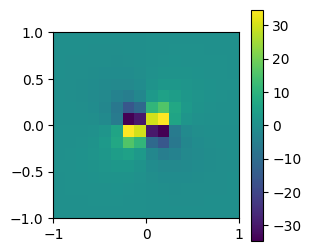

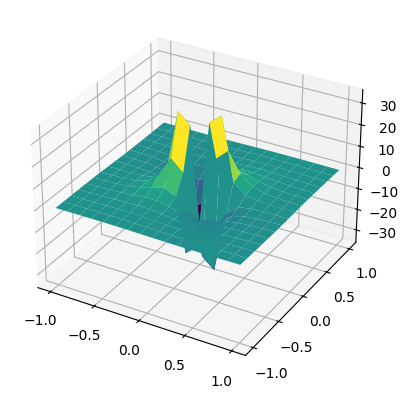

In [12]:
div = divergence(columb)
imshow(div)
plot_3d(div)

In [21]:
def curl(Fx, Fy, Fz):
    """
    Berechnet den Curl eines Vektorfeldes (Fx, Fy, Fz).

    Args:
        Fx, Fy, Fz: Komponenten des Vektorfeldes, als 3D-Numpy-Arrays.
        dx, dy, dz: Schritte in x-, y-, und z-Richtung.

    Returns:
        Curl als ein Tuple aus drei Arrays: (Cx, Cy, Cz)
    """
    # Partielle Ableitungen
    dFy_dz = np.gradient(Fy, dz, axis=2)  # dFy / dz
    dFz_dy = np.gradient(Fz, dy, axis=1)  # dFz / dy
    dFx_dz = np.gradient(Fx, dz, axis=2)  # dFx / dz
    dFz_dx = np.gradient(Fz, dx, axis=0)  # dFz / dx
    dFx_dy = np.gradient(Fx, dy, axis=1)  # dFx / dy
    dFy_dx = np.gradient(Fy, dx, axis=0)  # dFy / dx

    # Komponenten des Curls
    Cx = dFz_dy - dFy_dz
    Cy = dFx_dz - dFz_dx
    Cz = dFy_dx - dFx_dy

    return Cx, Cy, Cz

In [ ]:
R = 0.1
ex = np.exp(-1000*(R-np.sqrt(Y**2+X**2))**2-1000*Z**2)
Fx = -Y/(ex*0.1+0.001)
Fy = X/(ex*0.1+0.001)
Fz = np.zeros_like(X)
Cx,Cy,Cz = curl(Fx,Fy,Fz)


# Parameters and vector field
R = 0.5

#intensity = 0.1/ np.exp(10 * (R - np.sqrt(Y**2 + X**2))**2 + 10 * Z**2)
#Fx = -Y *intensity
#Fy = X * intensity
#Fz = np.zeros_like(X)

# Subsample for plotting (to avoid too many arrows)
skip = (slice(None, None, 2), slice(None, None, 2), slice(None, None, 2))

# Create a figure
fig = plt.figure(figsize=(14, 7))

# Plot the original vector field
ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(X[skip], Y[skip], Z[skip], Fx[skip], Fy[skip], Fz[skip], length=0.1, normalize=True)
ax1.set_title('Original Vector Field')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot the curl of the vector field
ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(X[skip], Y[skip], Y[skip], Cx[skip], Cy[skip], Cz[skip], length=0.1, normalize=True, color='r')
ax2.set_title('Curl of the Vector Field')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Project the curl onto the xy-plane (ignore the z-component)
Cx_2d = Cx[:, :, Cx.shape[2] // 2]  # Take the central slice along the z-axis
Cy_2d = Cy[:, :, Cy.shape[2] // 2]  # Take the central slice along the z-axis
Cz_2d = Cz[:, :, Cz.shape[2] // 2]  # Take the central slice along the z-axis

Fx_2d = Fx[:, :, Fx.shape[2] // 2]  # Take the central slice along the z-axis
Fy_2d = Fy[:, :, Fy.shape[2] // 2]  # Take the central slice along the z-axis
Fz_2d = Fz[:, :, Fz.shape[2] // 2]  # Take the central slice along the z-axis


# Plot the 2D projection
fig, ax = plt.subplots(figsize=(8, 6))
ax.quiver(X[:, :, 0], Y[:, :, 0], Cy_2d, Cz_2d, angles='xy', scale_units='xy', scale=1)
ax.set_title('Projection of Curl onto Xy-Plane')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')

plt.tight_layout()
plt.show()


In [ ]:

import numpy as np

# Define the grid
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
z = np.linspace(-1, 1, 200)
X, Y, Z = np.meshgrid(x, y, z)

# Parameters and vector field
R = 0.5

#intensity = 0.1/ np.exp(10 * (R - np.sqrt(Y**2 + X**2))**2 + 10 * Z**2)
#Fx = -Y *intensity
#Fy = X * intensity
#Fz = np.zeros_like(X)



# Curl function
def curl(Fx, Fy, Fz, dx, dy, dz):
    dFy_dz = np.gradient(Fy, dz, axis=2)  # ∂Fy/∂z
    dFz_dy = np.gradient(Fz, dy, axis=1)  # ∂Fz/∂y
    dFx_dz = np.gradient(Fx, dz, axis=2)  # ∂Fx/∂z
    dFz_dx = np.gradient(Fz, dx, axis=0)  # ∂Fz/∂x
    dFx_dy = np.gradient(Fx, dy, axis=1)  # ∂Fx/∂y
    dFy_dx = np.gradient(Fy, dx, axis=0)  # ∂Fy/∂x

    # Curl components
    Cx = dFz_dy - dFy_dz
    Cy = dFx_dz - dFz_dx
    Cz = dFy_dx - dFx_dy

    return Cx, Cy, Cz

# Compute the curl
dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]
Cx, Cy, Cz = curl(Fx, Fy, Fz, dx, dy, dz)


import plotly.graph_objects as go

fig = go.Figure(data=go.Cone(x=X.flatten(), y=Z.flatten(), z=Z.flatten(), u=Cx.flatten(), v=Cy.flatten(), w=Cz.flatten()))


fig.show()
